## Neural Network Prediction of Sea Level Rise Based on Greenhouse Gas Emissions

* **Course:** Foundations of Machine Learning: Theory and Practice (SoSe 2025)
* **Instructor:** Prof. Dr. Elia Bruni
* **Students:**
    * Johanna Pilz - 985733
    * Martin Iribarren Tortone - 1011094
* **Submission Date:** 22.08.2025

---

## Notebook Description

This notebook investigates and consolidates available data sources and the possibility to combine and extrapolate them into continous data. It focuses on identifying sources of historical greenhouse gas (GHG) emissions, future emission scenarios, and sea level data.

## Introduction: Predicting Sea Level Rise with Machine Learning

Global sea level rise is one of the most significant consequences of climate change, posing a critical threat to coastal communities and ecosystems worldwide. As illustrated in figure below, the primary driver of this rise is the increasing concentration of greenhouse gases (GHGs) in the atmosphere, resulting from human activities. These gases trap heat, warming the planet and causing both thermal expansion of ocean water and the melting of land ice and glaciers.

This project explores the relationship between GHG emissions and sea level change using machine learning techniques. We aim to develop a simple predictive model capable of forecasting future sea level rise based on different GHG emission scenarios.

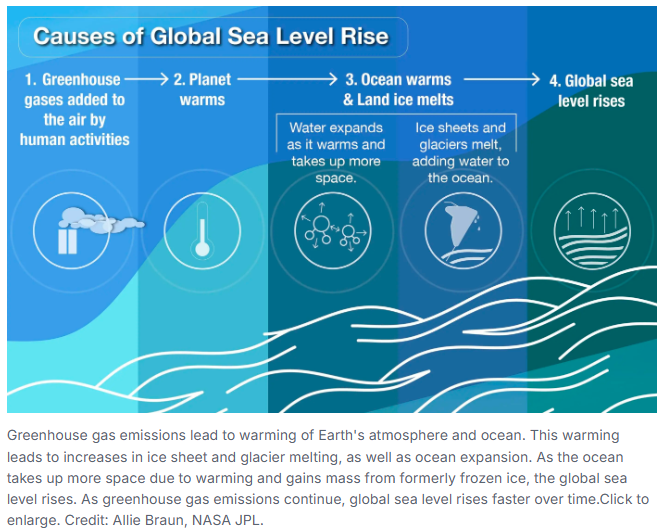

In [42]:
from IPython.display import Image
Image(filename='images/cgslr.png')

## Data exploration

The first step in this project involved a comprehensive search for available datasets pertaining to historical greenhouse gas emissions, future emission predictions, and past sea level rise observations. This exploration led to the compilation of multiple data sources, requiring the consideration of time resolutions and potential inconsistencies to create a cohesive dataset suitable for machine learning analysis.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import os

### Past Greenhouse Gas emissions and Predictions

##### Source: PCC, 2024. IPCC AR6 Synthesis Report LR Figure 2.5 (a): Global GHG emissions of modelled pathways. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/gadr-8q65   Titel anhand dieser DOI in Citavi-Projekt übernehmen. Accessed DAY MONTH YEAR

In [44]:
# Read the data file
df_pred_raw = pd.read_excel("../data/AR6-SYR-LR-F2-5-Panel(a).xlsx", sheet_name="Data")

# Transform the data frame
df_pred = df_pred_raw.drop([1,2,3,4,6,7,8,10,11,13,14,16])
df_pred = df_pred.drop(['Unnamed: 1',2019], axis=1)
years_past = np.array(df_pred.columns[1:7])
years_pred = np.array(df_pred.columns[6:])

# Extract the past emission
GHG_past = df_pred.iloc[[0]].values[0,1:7]

# Rename the scenarios
df_pred = df_pred.rename(columns={'spm_cat (year)': 'Year'})
df_pred = df_pred.set_index('Year')
df_pred = df_pred.transpose()
df_pred = df_pred.drop('Past GHG emissions (Black line) ', axis=1)
df_pred = df_pred.rename(columns={'Trend from implemented policies (Lowest bound of  red shading ) ': 'Trend from implemented policies','Limit warming to 2°C (>67%) or return warming to 1.5°C (>50%) after a high overshoot, NDCs until 2030 (Median , dark navy blue line )': 'Limit to 2°C or return to 1.5°C after a high overshoot', 'Limit warming to 2°C (>67%) (Median , dark green line )': 'Limit warming to 2°C', 'Limit warming to 1.5°C (>50%) with no or limited overshoot ( Median ligh blue line ) ': 'Limit warming to 1.5°C'})
df_pred = df_pred.drop([2010,2011,2012,2013,2014], axis=0)


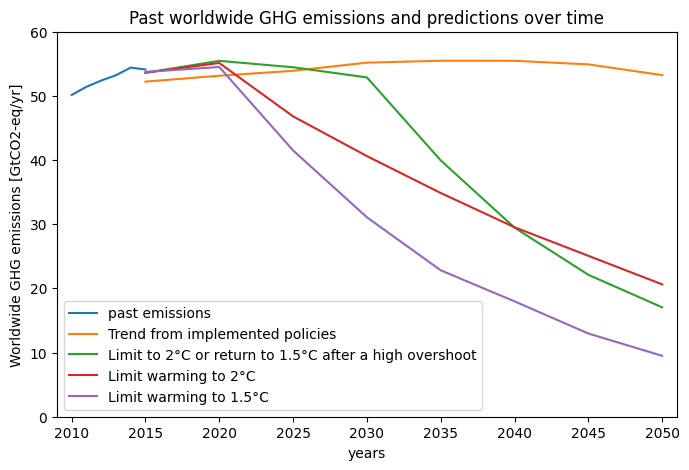

In [45]:
# Plot Past GHG emissions and predictions
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(years_past,GHG_past, label = "past emissions")
for scenario in df_pred.columns:
    ax1.plot(years_pred,df_pred[scenario], label = scenario)
ax1.set_title(r'Past worldwide GHG emissions and predictions over time')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
ax1.axis([2009, 2051, 0, 60])
fig.savefig('images/data_projections.png')

### Past Greenhouse Gas Emissions

##### Source 1: The first source is included in the data for the predictions of different greenhouse gas scenarios (see above).

##### Source 2: IPCC, 2025. IPCC AR6 Synthesis Report LR Figure 2.2 (c): Global net anthropogenic GHG emissions by region (1990-2019). Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/486h-bt03  Titel anhand dieser DOI in Citavi-Projekt übernehmen. Accessed DAY MONTH YEAR.

In [46]:
# Read the data file
df_past_GHG = pd.read_excel("../data/AR6-SYR-LR-F2-2-Panel(c).xlsx", sheet_name="GHG emisions (GtCO2 eq per yr) ")

# Transform the dataframe
df_past_GHG = df_past_GHG.groupby('Year').sum()
df_past_GHG = df_past_GHG.drop('Region', axis=1)

##### Source 3: Jones, Matthew W.; Peters, Glen P.; Gasser, Thomas; Andrew, Robbie M.; Schwingshackl, Clemens; Gütschow, Johannes et al. (2024): National contributions to climate change due to historical emissions of carbon dioxide, methane and nitrous oxide.

In [47]:
# Fetch the data
df_past_GHG2 = pd.read_csv("https://ourworldindata.org/grapher/total-ghg-emissions.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Transform the dataframe
df_past_GHG2 = df_past_GHG2.loc[df_past_GHG2['Entity'] == 'World']
df_past_GHG2 = df_past_GHG2.drop(['Entity','Code'], axis=1)
df_past_GHG2 = df_past_GHG2.set_index('Year')

# Adjust the emission unit
df_past_GHG2.annual_emissions_ghg_total_co2eq *= 10**(-9)

To establish a robust historical baseline, we evaluated two datasets containing past greenhouse gas (GHG) emissions, assessing the length of time each dataset covers and their consistency. A key aspect of this comparison involved examining the compatibility of each historical dataset with the future emission scenario dataset, specifically focusing on overlapping time periods and consistency in reported emission units.

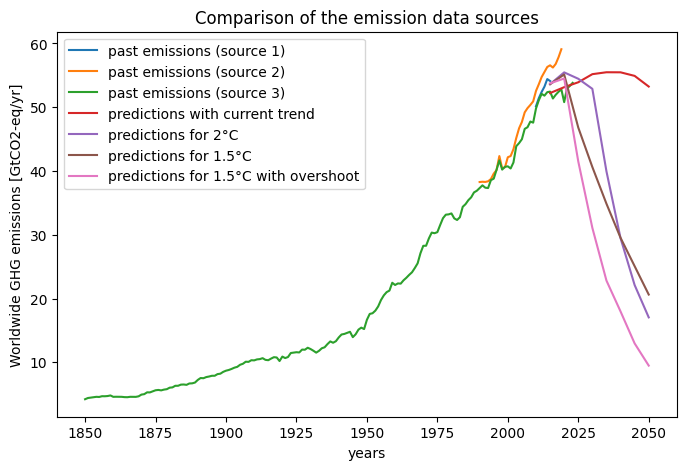

In [48]:
# Comparison of the three emission data sources
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(years_past,GHG_past, label = "past emissions (source 1)")
ax1.plot(df_past_GHG, label = "past emissions (source 2)")
ax1.plot(df_past_GHG2, label = "past emissions (source 3)")
scen_labels = ["predictions with current trend", "predictions for 2°C", "predictions for 1.5°C", "predictions for 1.5°C with overshoot"]
for scenario,label in zip(df_pred.columns, scen_labels):
    ax1.plot(years_pred,df_pred[scenario], label = label)
ax1.set_title(r'Comparison of the emission data sources')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
fig.savefig('images/comparison_past_emissions.png')

The comparison of historical GHG emission data from three sources (as visualized in the figure) reveals a stronger alignment with both historical trends and future emission scenarios derived from Source 1. Furthermore, Source 3 provides a significantly longer historical record of emissions compared to Source 2. Therefore, we will proceed using data from Source 3 for the remainder of the analysis and discontinue use of data from Source 2.

##### Years of overlap: 
To seamlessly combine the historical emission data from Sources 1 and 3, we are identifying the year where the difference between their reported emissions is minimized. This approach aims to find the optimal point to join the datasets, creating a smooth and consistent historical record for our analysis.

In [49]:
print("--------------------------------------------------------------")
print("Years of overlap:")
print("--------------------------------------------------------------")
print(f"{'Year':<15} {'Source 1':<15} {'Source 3':<15} {'Difference':<15}")
print("--------------------------------------------------------------")
for i,y in enumerate(years_past):
    emission3 = df_past_GHG2.loc[[y]].annual_emissions_ghg_total_co2eq.iloc[0]
    print(f"{y:<15} {GHG_past[i]:<15.2f} {emission3:<15.4} {emission3-GHG_past[i]:<15.2}")
print("--------------------------------------------------------------")

--------------------------------------------------------------
Years of overlap:
--------------------------------------------------------------
Year            Source 1        Source 3        Difference     
--------------------------------------------------------------
2010            50.15           49.8            -0.35          
2011            51.42           51.09           -0.33          
2012            52.39           52.09           -0.3           
2013            53.22           51.81           -1.4           
2014            54.41           52.36           -2.1           
2015            54.11           52.44           -1.7           
--------------------------------------------------------------


As shown in the table above, the analysis identified 2012 as the year with the smallest difference in reported emissions between Sources 1 and 3. Consequently, we will construct a combined historical dataset by utilizing data from Source 3 up to and including 2011, and then transitioning to data from Source 1 from 2012 onwards.

In [50]:
# Combine historical data sources
GHG_past_comb = df_past_GHG2.copy()
GHG_past_comb.loc[[2012, 2013, 2014], 'annual_emissions_ghg_total_co2eq'] = [float(emi) for emi in GHG_past[2:5]]
del_years = np.arange(2015,2024)
GHG_past_comb = GHG_past_comb.drop(del_years)

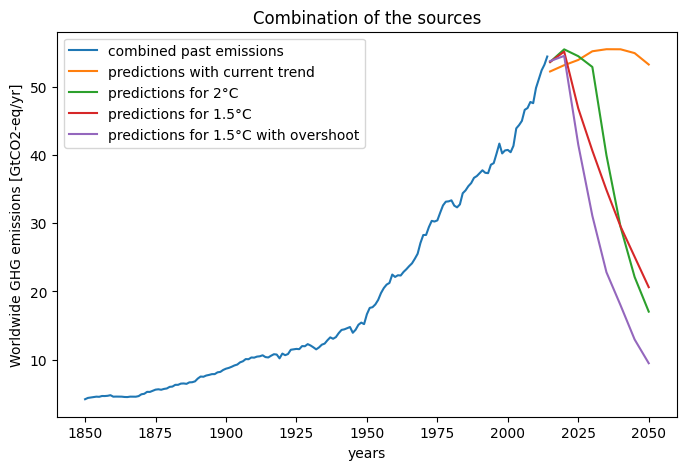

In [51]:
# Plot the combined GHG emissions
fig=plt.figure(figsize = (8,5))
ax1=fig.add_subplot(111)
ax1.plot(GHG_past_comb, label = "combined past emissions")
for scenario,label in zip(df_pred.columns, scen_labels):
    ax1.plot(years_pred,df_pred[scenario], label = label)
ax1.set_title(r'Combination of the sources')
ax1.legend()
ax1.set_xlabel('years')
ax1.set_ylabel('Worldwide GHG emissions [GtCO2-eq/yr]')
fig.savefig('images/data_combined_emissions.png')

The figure above illustrates our combined dataset of historical and projected GHG emissions. While the historical data is available at yearly intervals, the future emission scenarios are provided only every 5 years. Therefore, during data preparation, the future GHG emission scenarios will be interpolated to match the yearly frequency of the historical data.

### Sea level rise

##### Source: NOAA Climate.gov (2022) Global Sea Level. with  University of Hawaii Fast Delivery sea level data

In [52]:
# Fetch the data
df_sealevel = pd.read_csv("https://ourworldindata.org/grapher/sea-level.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Limpiar el DataFrame
df_sealevel = df_sealevel.drop(['Entity', 'Code', 'sea_level_church_and_white_2011', 'sea_level_average'], axis=1)
df_sealevel = df_sealevel.dropna()

# Convierte la columna 'Day' a datetime
df_sealevel['Day'] = pd.to_datetime(df_sealevel['Day'])
df_sealevel_anual = df_sealevel.groupby(df_sealevel['Day'].dt.year)['sea_level_uhslc'].mean().to_frame()


# Agrupa los datos por año y calcula la media
# El índice del DataFrame resultante será el año
df_sealevel = df_sealevel.groupby(df_sealevel['Day'].dt.year)['sea_level_uhslc'].mean().to_frame()



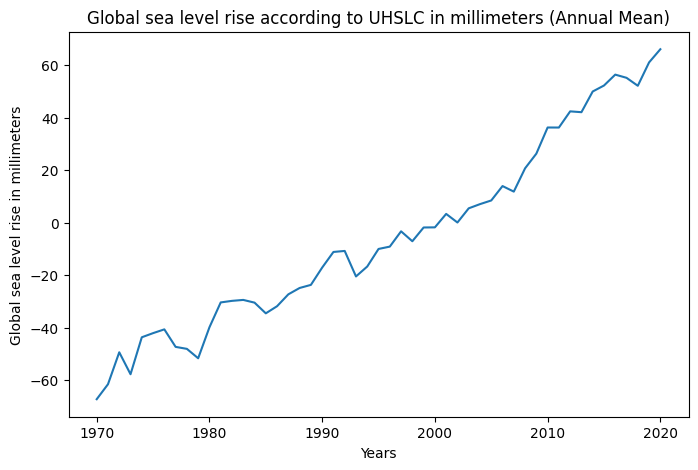

In [53]:
# Graficar el aumento del nivel del mar (anual)
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)

# Los datos del eje X son el índice del DataFrame (el año)
ax1.plot(df_sealevel_anual.index, df_sealevel_anual['sea_level_uhslc'])
ax1.set_title(r'Global sea level rise according to UHSLC in millimeters (Annual Mean)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Global sea level rise in millimeters')
fig.savefig('images/data_sealevelrise.png')

plt.show() # Muestra la gráfica

# 1. Model Training

This notebook includes the training of the sea level prediction models witha baseline linear model and a 2-hidden-layer non-linear model. It performs the following steps:
1. Loads and preprocesses the historical GHG and sea level data.
2. Splits the data into training, validation, and test sets using a **chronological** split, which is appropriate for time-series data.
3. Initializes two models: a baseline linear model and a 2-hidden-layer non-linear model.
4. Trains both models on the training data.
5. Saves the trained model objects to the `../models/` directory for later use in analysis and prediction.

### 1.1 Setup and Data Preparation

We utilized the processed data from the data_exploration notebook and applied normalization. Subsequently, we created the training data by pairing multi-year GHG emission inputs with corresponding historical sea level rise values. We initially selected a 15-year input timespan, recognizing the inherent time delay between GHG emissions and their impact on sea level rise. This delay is primarily due to the cumulative effect of emissions on global temperature, which drives long-term processes such as the melting of ice sheets and glaciers over decades. To prepare our model for predicting future sea level changes based on projected GHG emission scenarios, we refrained from shuffling the data and instead implemented a chronological split into training, validation, and test sets. This ensures the test and validation sets represent entirely unseen data, preventing data leakage and allowing for a realistic evaluation of the model's predictive capabilities. We maintained a standard split of 70% for training, 15% for validation, and 15% for testing.

In [54]:
# Set random seed for reproducibility
np.random.seed(42)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Prepare the data for normalization
df_pred = df_pred.rename(columns={'Trend from implemented policies (Lowest bound of  red shading ) ': 'Trend from implemented policies','Limit warming to 2°C (>67%) or return warming to 1.5°C (>50%) after a high overshoot, NDCs until 2030 (Median , dark navy blue line )': 'Limit warming to 2°C or return warming to 1.5°C after a high overshoot', 'Limit warming to 2°C (>67%) (Median , dark green line )': 'Limit warming to 2°C', 'Limit warming to 1.5°C (>50%) with no or limited overshoot ( Median ligh blue line ) ': 'Limit warming to 1.5°C'})



# Normalization 
GHG_past_norm = (GHG_past_comb - GHG_past_comb.mean()) / GHG_past_comb.std()
sealevel_norm = (df_sealevel - df_sealevel.mean()) / df_sealevel.std()

# Sequence and Splitting 
def get_GHG_sequence(n_years, df_GHG, start_year, end_year):
    X, y = list(), list()
    for i in range(start_year, end_year + 1):
        # Encontrar la posición de los años
        start_ix = df_GHG.index.get_loc(i - n_years)
        # Ajustar el índice final para incluir `n_years`
        end_ix = df_GHG.index.get_loc(i - 1) + 1  # Sumar 1 para incluir el año final

        # Usar .iloc para rebanar por posición numérica
        seq_x = df_GHG.iloc[start_ix:end_ix]
        X.append(seq_x.to_numpy())
        y.append(sealevel_norm.loc[i].values)
    return np.array(X), np.array(y)

timespan = 15           
train_end_year = 2000
validation_end_year = 2007
test_end_year = 2014

X_train, y_train = get_GHG_sequence(timespan, GHG_past_norm, 1970, train_end_year)
X_val, y_val = get_GHG_sequence(timespan, GHG_past_norm, train_end_year + 1, validation_end_year)
X_test, y_test = get_GHG_sequence(timespan, GHG_past_norm, validation_end_year + 1, test_end_year)

print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

Training set size: 31
Validation set size: 7
Test set size: 7


In [55]:
import numpy as np
import pickle

class NeuralNetwork_0hl:
    def __init__(self, input_size, output_size, dyn_learningrate=False):
        """
        Initialize the neural network
        """
        self.input_size = input_size
        self.output_size = output_size
        # Random weights and biases
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.random.randn(output_size)
        self.dyn_learningrate = dyn_learningrate

    def linear(self, x):
        """
        linear activation function
        """
        return x

    def linear_derivative(self, x):
        """
        derivation of linear funktion
        """
        return 1

    def forward(self, input_data):
        """
        Forward Propagation
        """
        self.output = self.linear(np.dot(input_data, self.weights) + self.bias)
        return self.output

    def backward(self, input_data, target):
        """
        Backpropagation
        """
        # Calculate the error
        error = target - self.output

        # Calculate the gradient
        delta = error * self.linear_derivative(self.output)

        # Update weights and bias
        self.weights += self.learning_rate * np.dot(input_data.T, delta)
        self.bias += self.learning_rate * np.sum(delta, axis=0)

    def train(self, input_data, target, epochs, learningrate=0.01, print_output=True):
        """
        Train the network
        """
        self.learning_rate = learningrate
        print_epoch = int(epochs / 20)
        arr_loss = []

        for epoch in range(epochs):
            self.forward(input_data)
            self.backward(input_data, target)
            error = np.mean(np.square(target - self.output))  # Mean Squared Error
            arr_loss.append(error)

            if self.dyn_learningrate:
                if epoch % 100 == 0:
                    self.learning_rate *= 0.9  # Reduce the learning rate every 100 epochs

            if epoch % print_epoch == 0 and print_output:
                print(f"Epoch {epoch + 1}, MSE: {error:.4f}")
            percentage_complete = (epoch / epochs) * 100
            print("Progress: {:.2f}%".format(percentage_complete), end='\r')

        return arr_loss

    def predict(self, input_data):
        """
        Prediction with the trained network
        """
        return self.forward(input_data)

    def save_model(self, file_path):
        """
        Save the trained model to a file.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        """
        Load a model from a file.
        """
        with open(file_path, 'rb') as f:
            return pickle.load(f)


class NeuralNetwork_2hl:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dyn_learningrate=False):
        """
        Initializes the neural network with two hidden layers.
        """
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.dyn_learningrate = dyn_learningrate

        # Initialize weights and biases randomly
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)
        self.weights3 = np.random.randn(hidden_size2, output_size)
        self.bias3 = np.random.randn(output_size)

    def relu(self, x):
        """
        ReLU activation function.
        """
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """
        Derivative of the ReLU function.
        """
        return np.where(x > 0, 1, 0)

    def forward(self, input_data):
        """
        Forward propagation.
        """
        # Layer 1
        self.z1 = np.dot(input_data, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)

        # Layer 2
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.relu(self.z2)

        # Output Layer
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.output = self.z3  # No activation function on the output layer for regression
        return self.output

    def backward(self, input_data, target):
        """
        Backpropagation.
        """
        # Calculate the error
        error = target - self.output

        # Calculate the delta for the output layer
        delta3 = error * 1 
        
        # Calculate the delta for the second hidden layer
        delta2 = delta3.dot(self.weights3.T) * self.relu_derivative(self.z2)

        # Calculate the delta for the first hidden layer
        delta1 = delta2.dot(self.weights2.T) * self.relu_derivative(self.z1)

        # Update weights and biases
        self.weights3 += self.learning_rate * self.a2.T.dot(delta3)
        self.bias3 += self.learning_rate * np.sum(delta3, axis=0)

        self.weights2 += self.learning_rate * self.a1.T.dot(delta2)
        self.bias2 += self.learning_rate * np.sum(delta2, axis=0)

        self.weights1 += self.learning_rate * input_data.T.dot(delta1)
        self.bias1 += self.learning_rate * np.sum(delta1, axis=0)

    def train(self, input_data, target, epochs, learningrate=0.01, print_output=True):
        """
        Train the network.
        """
        self.learning_rate = learningrate
        print_epoch = int(epochs / 20)
        arr_loss = []

        for epoch in range(epochs):
            self.forward(input_data)
            self.backward(input_data, target)
            
            if self.dyn_learningrate:
                if epoch % 100 == 0:
                    self.learning_rate *= 0.9

            error = np.mean(np.square(target - self.output))  # Mean Squared Error
            arr_loss.append(error)
            if epoch % print_epoch == 0 and print_output:
                print(f"Epoch {epoch + 1}, MSE: {error:.4f}")
            percentage_complete = (epoch / epochs) * 100
            print("Progress: {:.2f}%".format(percentage_complete), end='\r')
        return arr_loss

    def predict(self, input_data):
        """
        Prediction with the trained network.
        """
        return self.forward(input_data)

    def save_model(self, file_path):
        """
        Save the trained model to a file.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        """
        Load a model from a file.
        """
        with open(file_path, 'rb') as f:
            return pickle.load(f)


class NeuralNetwork_2hl_ridge_early:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dyn_learningrate=False):
        """
        Initializes the neural network with two hidden layers.
        """
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        self.dyn_learningrate = dyn_learningrate

        # Initialize weights and biases randomly
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.random.randn(hidden_size1)
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.random.randn(hidden_size2)
        self.weights3 = np.random.randn(hidden_size2, output_size)
        self.bias3 = np.random.randn(output_size)

        self.best_weights1 = None
        self.best_bias1 = None
        self.best_weights2 = None
        self.best_bias2 = None
        self.best_weights3 = None
        self.best_bias3 = None

    def relu(self, x):
        """
        ReLU activation function.
        """
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """
        Derivative of the ReLU function.
        """
        return np.where(x > 0, 1, 0)

    def forward(self, input_data):
        """
        Forward propagation.
        """
        # Layer 1
        self.z1 = np.dot(input_data, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)

        # Layer 2
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.relu(self.z2)

        # Output Layer
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.output = self.z3  # No activation function on the output layer for regression
        return self.output

    def backward(self, input_data, target):
        """
        Backpropagation.
        """
        # Calculate the error
        error = target - self.output

        # Calculate the delta for the output layer
        delta3 = error * 1 
        
        # Calculate the delta for the second hidden layer
        delta2 = delta3.dot(self.weights3.T) * self.relu_derivative(self.z2)

        # Calculate the delta for the first hidden layer
        delta1 = delta2.dot(self.weights2.T) * self.relu_derivative(self.z1)

        # Update weights and biases
        self.weights3 += self.learning_rate * (self.a2.T.dot(delta3) - self.l2_lambda * self.weights3)
        self.bias3 += self.learning_rate * np.sum(delta3, axis=0)

        self.weights2 += self.learning_rate * (self.a1.T.dot(delta2) - self.l2_lambda * self.weights2)
        self.bias2 += self.learning_rate * np.sum(delta2, axis=0)

        self.weights1 += self.learning_rate * (input_data.T.dot(delta1) - self.l2_lambda * self.weights1)
        self.bias1 += self.learning_rate * np.sum(delta1, axis=0)

    def train(self, input_data, target, epochs, X_val, y_val, patience, learningrate=0.01, l2_lambda=0.0, print_output=True):
        """
        Train the network with early stopping.
        """
        self.learning_rate = learningrate
        self.l2_lambda = l2_lambda
        print_epoch = int(epochs / 20)
        
        history = {'train_loss': [], 'val_loss': []}
        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(epochs):
            # Forward and backward for training data
            output = self.forward(input_data)
            self.backward(input_data, target)
            
            # Calculate training loss
            train_loss = np.mean(np.square(target - output))
            history['train_loss'].append(train_loss)

            # Calculate validation loss
            val_output = self.forward(X_val)
            val_loss = np.mean(np.square(y_val - val_output))
            history['val_loss'].append(val_loss)

            # Early Stopping logic
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                # Save the best model
                self.best_weights1 = self.weights1.copy()
                self.best_bias1 = self.bias1.copy()
                self.best_weights2 = self.weights2.copy()
                self.best_bias2 = self.bias2.copy()
                self.best_weights3 = self.weights3.copy()
                self.best_bias3 = self.bias3.copy()
                patience_counter = 0
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch + 1}. Best validation MSE: {best_val_loss:.4f}')
                # Restore the best model
                self.weights1 = self.best_weights1
                self.bias1 = self.best_bias1
                self.weights2 = self.best_weights2
                self.bias2 = self.best_bias2
                self.weights3 = self.best_weights3
                self.bias3 = self.best_bias3
                return history

            if self.dyn_learningrate:
                if epoch % 100 == 0:
                    self.learning_rate *= 0.9

            if epoch % print_epoch == 0 and print_output:
                print(f"Epoch {epoch + 1}, Train MSE: {train_loss:.4f}, Val MSE: {val_loss:.4f}")
            
            percentage_complete = ((epoch + 1) / epochs) * 100
            print(f"Progress: {percentage_complete:.2f}%", end='\r')

        # Restore the best model if loop completes without early stopping
        if self.best_weights1 is not None:
            self.weights1 = self.best_weights1
            self.bias1 = self.best_bias1
            self.weights2 = self.best_weights2
            self.bias2 = self.best_bias2
            self.weights3 = self.best_weights3
            self.bias3 = self.best_bias3
        
        return history

    def predict(self, input_data):
        """
        Prediction with the trained network.
        """
        return self.forward(input_data)

    def save_model(self, file_path):
        """
        Save the trained model to a file.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        """
        Load a model from a file.
        """
        with open(file_path, 'rb') as f:
            return pickle.load(f)

### 1.2 Train Baseline Model (Linear)

In [56]:

print('Training Baseline Model')
nn_base = NeuralNetwork_0hl(input_size=timespan, output_size=1)

# Save the model before training
nn_base.save_model('../models/baseline_model_before_training.pkl')

mse_base_train = nn_base.train(np.squeeze(X_train), y_train, epochs=20000, learningrate=0.001, print_output=False)
print('Training complete.')

# Save the model
nn_base.save_model('../models/baseline_model.pkl')
print('Baseline model saved to ../models/baseline_model.pkl')

Training Baseline Model
Training complete.
Baseline model saved to ../models/baseline_model.pkl


### 1.3 Train 2-Hidden-Layer Model (Non-Linear)

In [57]:
print('Training 2-Hidden-Layer Model')
nn_2hl = NeuralNetwork_2hl(input_size=timespan, hidden_size1=8, hidden_size2=4, output_size=1)

# Save the model before training
nn_2hl.save_model('../models/2hl_model_before_training.pkl')
mse_2hl_train = nn_2hl.train(np.squeeze(X_train), y_train, epochs=20000, learningrate=0.001, print_output=False)
print('Training complete.')

# Save the model
nn_2hl.save_model('../models/2hl_model.pkl')
print('2-layer model saved to ../models/2hl_model.pkl')

Training 2-Hidden-Layer Model


Training complete.
2-layer model saved to ../models/2hl_model.pkl


### 3.5 Train 2-Hidden-Layer Model (L2 and Early Stopping)

In [58]:
print('Training 2-Hidden-Layer Ridge Early Stopping Model')
nn_2hl_ridge = NeuralNetwork_2hl_ridge_early(input_size=timespan, hidden_size1=8, hidden_size2=4, output_size=1)

# Save the model before training
nn_2hl_ridge.save_model('../models/2hl_ridge_early_model_before_training.pkl')

# Train the model with the new parameters
history = nn_2hl_ridge.train(
    np.squeeze(X_train),
    y_train,
    X_val=np.squeeze(X_val),
    y_val=y_val,
    epochs=20000,
    learningrate=0.001,
    l2_lambda=0.01,
    patience=200,
    print_output=True
)
print('Training complete')

# Save the trained model
nn_2hl_ridge.save_model('../models/2hl_ridge_early_model.pkl')
print('2-layer ridge early stopping model saved to ../models/2hl_ridge_early_model.pkl')

Training 2-Hidden-Layer Ridge Early Stopping Model
Epoch 1, Train MSE: 1.7766, Val MSE: 0.5474
Early stopping at epoch 364. Best validation MSE: 0.0325
Training complete
2-layer ridge early stopping model saved to ../models/2hl_ridge_early_model.pkl


# 2. Model Analysis and Comparison

This notebook loads the pre-trained models and evaluates their performance on the test set. It performs the following steps:
1. Loads and preprocesses the same historical data to recreate the exact same test set that the models were not trained on.
2. Loads the trained model objects (`baseline_model.pkl` and `2hl_model.pkl`) from the `../models/` directory.
3. Analysis of the influence of hyper parameters (number of epochs, input timespan)
4. Generates predictions from both models on the training, validation, and test sets.
5. Calculates the final Mean Squared Error (MSE) for each model on each dataset.
6. Visualizes the predictions against the actual values and presents a summary table.

### 2.1 Setup and Data Preparation

The following data preparation steps are consistent with those detailed in the model_training notebook.

##### Import Data from the Data exploration file

### 2.2 Load Pre-trained Models

In [59]:
# Load the models from the files
nn_base = NeuralNetwork_0hl.load_model('../models/baseline_model.pkl')
nn_2hl = NeuralNetwork_2hl.load_model('../models/2hl_model.pkl')
nn_2hl_ridge_early = NeuralNetwork_2hl_ridge_early.load_model('../models/2hl_ridge_early_model.pkl')

print('Models loaded successfully.')

Models loaded successfully.


### 2.3 Analyse the Models

To analyze and improve the performance of our two models, which were initially trained with thoughtfully selected, but assumption-based hyperparameters, we aim to investigate the effect of key hyperparameters on the MSE to potentially mitigate overfitting. The initial number of epochs was set relatively low at 20000, as our training dataset is not particularly large and we sought to avoid overfitting. The hyperparameters of interest  for our analyse are the number of training epochs and the timespan of GHG emission inputs. Each analysis compares the Mean Squared Error (MSE) on the training and validation data for the two-hidden-layer neural network, as a function of the hyperparameter being examined. To reduce the impact of random weight and bias initialization, the MSE was averaged over 100 or 1000 independent training runs, each using a newly initialized network.

### 2.3.1 Prevent overfitting for the single layer neural network

The following overfitting analysis requires significant processing time. To expedite the review process, we have included a pre-generated image of the results below, alongside the code used to perform the analysis.

np.random.seed()
arr_mse_train_overfit, arr_mse_vali_overfit = [],[]

for n_epochs in np.logspace(4, 6.5, num=20):
    
    sum_mse_train_overfit, sum_mse_vali_overfit = 0, 0

    for _ in range(100):
         
        # Train the NN
        nn = NeuralNetwork_0hl(input_size=15, output_size=1) 
        mse_train = nn.train(np.squeeze(X_train), y_train.reshape(-1, 1), epochs=int(n_epochs), learningrate = .001, print_output = False)
        
        # Create predictions for validation set
        pre_vali = nn.predict(np.array([np.squeeze(X_val)]))

        #  Add the MSE (for calculation of the mean)
        sum_mse_vali_overfit += np.mean(np.square(y_val - pre_vali))
        sum_mse_train_overfit += mse_train[-1]

        # Print error message if the MSE doesn't coverge
        if round(mse_train[-1],4) != round(mse_train[-2],4):
            print('Epochs: ' + str(int(n_epochs)) + '    Error: Not enough epochs!')

        # Calculate the mean        
    arr_mse_train_overfit += [sum_mse_train_overfit/100]
    arr_mse_vali_overfit += [sum_mse_vali_overfit/100]

    print('Epochs: ' + str(int(n_epochs)) + '   MSE = ' + str(round(arr_mse_train_overfit[-1],4)))

    # Plot the results of the MSE for different epochs
arr_epochs = np.logspace(4, 6.5, num=20)
arr_epochs = arr_epochs.astype(np.int64)
fig=plt.figure(figsize=(6,8),layout='constrained')
fig.suptitle(r'MSE for different training epochs', fontsize=14)
ax1=fig.add_subplot(211)
ax1.plot(arr_epochs,arr_mse_train_overfit)
ax1.set_title(r'MSE of training data')
ax2=fig.add_subplot(212)
ax2.plot(arr_epochs,arr_mse_vali_overfit)
ax2.set_title(r'MSE of validation data')
for ax in [ax1,ax2]:
    ax.set_xscale('log')
    ax.set_xlabel('number of training epochs')
    ax.set_ylabel('MSE')
fig.savefig('images/analysis_training_epochs.png')

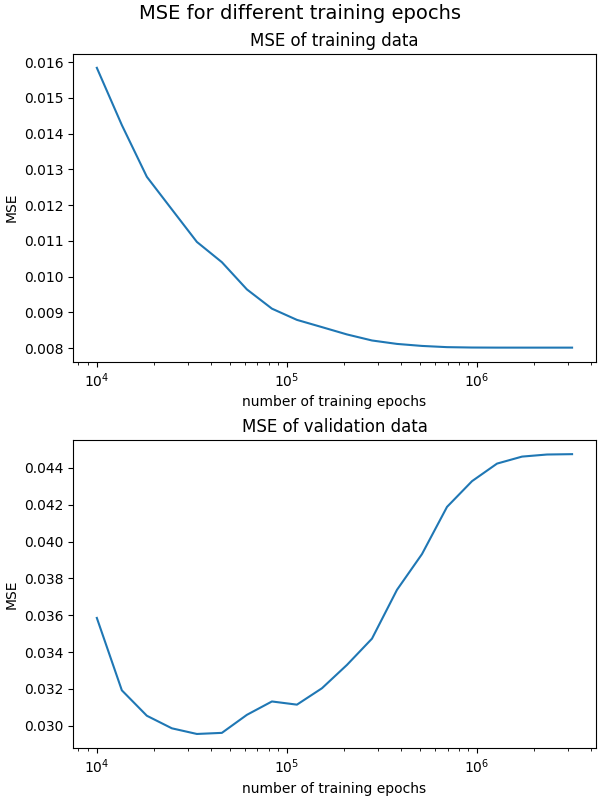

In [60]:
# Pre-generated image of the overfitting analysis
from IPython.display import Image
Image(filename='images/analysis_training_epochs.png')

The lowest MSE on the validation data was achieved after training the neural network for approximately 35,000 epochs. The MSE on the training data exhibited an exponential decline over the investigated interval of 10<sup>4</sup> to 10<sup>6.5</sup>, converging to around 0.008. Simultaneously, the MSE on the validation data decreased to a minimum at approximately 35,000 training epochs, after which it began to increase again. This suggests that training beyond this point leads to overfitting, and further increasing the number of epochs is not recommended. Therefore, subsequent analyses will be conducted using a training epoch of 35,000.

### 2.4.2 Analysis of the influence of the input timespan

Similar to the previous analysis, determining the influence of the input timespan requires substantial processing time. To facilitate review, we have again included a pre-generated image of the results alongside the code.

arr_mse_train, arr_mse_vali = [],[]
y_data = np.array(sealevel_norm.loc[1970:2014])

for timespan in np.arange(10,101,5):

    # Split the data
    X_train_loop, y_train_loop = get_GHG_sequence(timespan, GHG_past_norm, 1970, train_end_year)
    X_vali_loop, y_vali_loop = get_GHG_sequence(timespan, GHG_past_norm, train_end_year + 1, validation_end_year)

    sum_mse_train, sum_mse_vali = 0, 0

    for _ in range(1000):

        # Train the NN
        nn = NeuralNetwork_0hl(input_size=timespan, output_size=1) 
        mse_train = nn.train(np.squeeze(X_train_loop), y_train_loop.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)
        
        # Create predictions for validation set
        pre_vali = nn.predict(np.array([np.squeeze(X_vali_loop)]))

        # Add the MSE (for calculation of the mean)
        sum_mse_vali += np.mean(np.square(y_val - pre_vali))
        sum_mse_train += mse_train[-1]

        # Print error message if the MSE doesn't coverge
        if round(mse_train[-1],4) != round(mse_train[-2],4):
            print('Timespan: ' + str(timespan) + ' years:    Error: Not enough epochs!')

    # Calculate the mean        
    arr_mse_train += [sum_mse_train/1000]
    arr_mse_vali += [sum_mse_vali/1000]

    print('Timespan: ' + str(timespan) + ' years: MSE = ' + str(round(arr_mse_train[-1],4)))

    # Plot the results of the MSE for different input timespans
arr_timespans = np.arange(10,101,5)
fig=plt.figure(figsize=(6,8),layout='constrained')
fig.suptitle(r'MSE for different input timespans', fontsize=14)
ax1=fig.add_subplot(211)
ax1.plot(arr_timespans,arr_mse_train)
ax1.set_title(r'MSE of training data')
ax2=fig.add_subplot(212)
ax2.plot(arr_timespans,arr_mse_vali)
ax2.set_title(r'MSE of validation data')
for ax in [ax1,ax2]:
    ax.set_xlabel('input timespan')
    ax.set_ylabel('MSE')
fig.savefig('images/analysis_input_timespan.png')

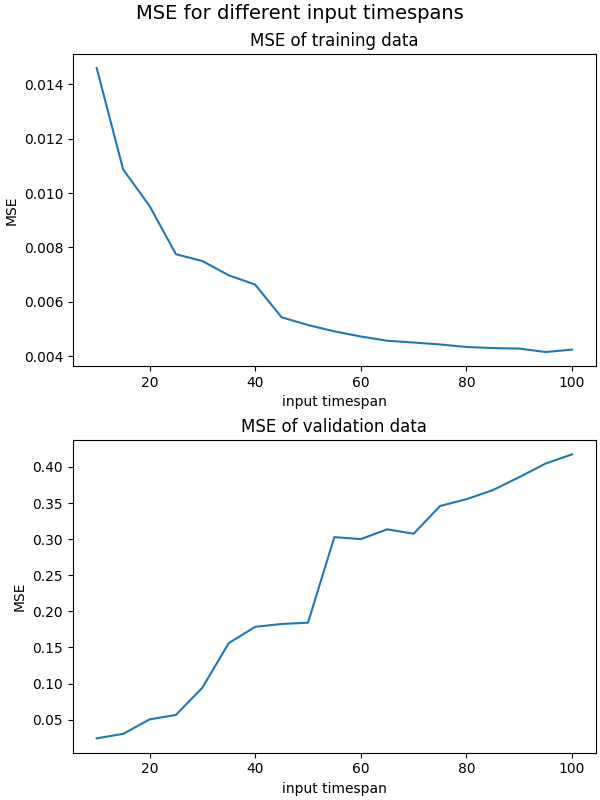

In [61]:
# Pre-generated image of the analysis of the influence of the input timespan
from IPython.display import Image
Image(filename='images/analysis_input_timespan.png')

Similar to the analysis of the number of training epochs, the analysis of the input timespan revealed an exponential decrease in MSE for the training data over the investigated interval of 10 to 100 years. The MSE of the validation data, however, increased steadily, with the minimum MSE occurring at the shortest investigated input timespan. Specifically, for the 10-year input timespan, the training data MSE was 0.015, while the validation data MSE was 0.024.

The particularly strong performance with a 10-year input timespan is somewhat surprising and contrasts with our initial assumptions. Given that GHG emissions have a long-term effect on sea level rise, we initially expected a longer timespan of emission data to more accurately capture this effect. We hypothesize that the interplay between the input timespan and the number of training epochs contributes to this outcome, as varying the number of training epochs for the analysis of the timespan of GHG emission input resulted in different validation data MSE values. Therefore, an optimal combination of training epochs and input timespan must be identified.  For this single-layer neural network, a combination of 35,000 training epochs and a 10-year input timespan appears to be beneficial.

However, it’s important to acknowledge that while effectively capturing the recent acceleration in sea level rise driven by increased GHG emissions over the last decade, the model may be less sensitive to longer-term trends and potentially underestimate the cumulative effects of past emissions.

### 2.4.3 Analysis of the number of training epochs for a specific 2 hidden-layer model

We attempted a similar hyperparameter analysis for the neural network with two hidden layers, but the results were more dispersed and less conclusive. This is likely due to the increased sensitivity of the two-hidden-layer network to the initial weights and biases, which are determined randomly. Consequently, the network’s performance is more susceptible to variations in these initial conditions.

However, the general trend – that an excessive number of training epochs and a large timespan of GHG emission inputs can lead to overfitting – remains evident. Due to this dependence on random initialization, we believe it is most effective to prevent overfitting and determine an optimal number of training epochs by analyzing a single, specifically initialized network. We will pursue this approach in the following analysis, acknowledging that the resulting findings may not be fully generalizable.

arr_mse_train_overfit_2hl, arr_mse_vali_overfit_2hl = [],[]

for n_epochs in np.linspace(10**3, 10**5, num=20):
         
    # Load model with weights and biases before it was trained and train it
    nn_2hl_old = NeuralNetwork_2hl.load_model('../models/2hl_model_before_training.pkl')
    mse_train = nn_2hl_old.train(np.squeeze(X_train), y_train.reshape(-1, 1), epochs=int(n_epochs), learningrate = .001, print_output = False)
    
    # Create predictions for validation set
    pre_vali = nn_2hl_old.predict(np.array([np.squeeze(X_val)]))

    # Calculate the mean        
    arr_mse_train_overfit_2hl += [mse_train[-1]]
    arr_mse_vali_overfit_2hl += [np.mean(np.square(y_val - pre_vali))]
    
    # Plot the results of the MSE for different epochs
arr_epochs = np.linspace(10**3, 10**5, num=20)
arr_epochs = arr_epochs.astype(np.int64)
fig=plt.figure(figsize=(6,8),layout='constrained')
fig.suptitle(r'MSE for different training epochs', fontsize=14)
ax1=fig.add_subplot(211)
ax1.plot(arr_epochs,arr_mse_train_overfit_2hl)
ax1.set_title(r'MSE of training data')
ax2=fig.add_subplot(212)
ax2.plot(arr_epochs,arr_mse_vali_overfit_2hl)
ax2.set_title(r'MSE of validation data')
for ax in [ax1,ax2]:
    ax.set_xlabel('number of training epochs')
    ax.set_ylabel('MSE')
fig.savefig('images/analysis_training_epochs_2hl_single.png')

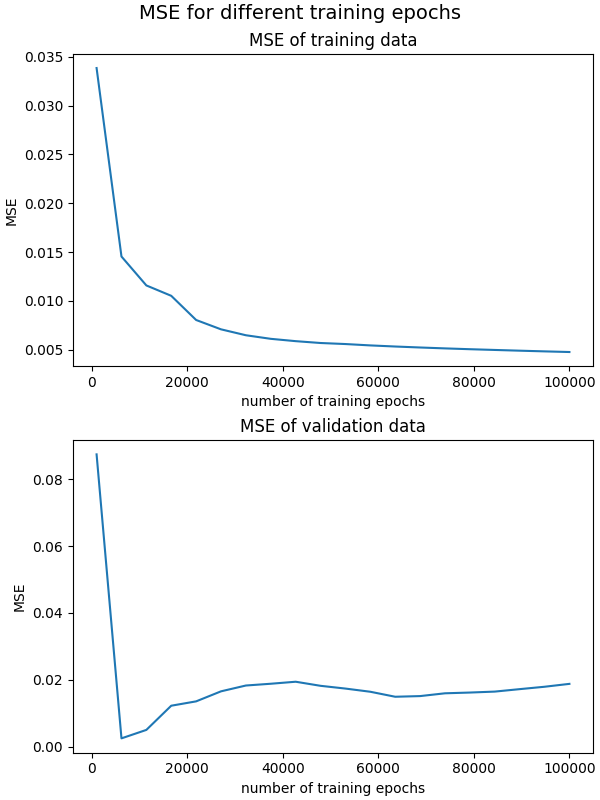

In [62]:
# Pre-generated image of the overfitting analysis
from IPython.display import Image
Image(filename='images/analysis_training_epochs_2hl_single.png')

The lowest MSE on the validation data was achieved after training the neural network for approximately 6000 epochs. The MSE on the training data exhibited an exponential decline over the investigated interval of 10<sup>3</sup> to 10<sup>5</sup>. Simultaneously, the MSE on the validation data decreased to a minimum at approximately 6000 training epochs, after which it began to increase again. This suggests that training beyond this point leads to overfitting, and further increasing the number of epochs is not recommended. 

### 2.4.4 Experiment with a dynamic learning rate

In [63]:
# Set random seed for reproducibility
np.random.seed(42)

# Create new inputs based on the optimized hyperparameters
X_train_new, y_train_new = get_GHG_sequence(10, GHG_past_norm, 1970, train_end_year)
X_val_new, y_val_new = get_GHG_sequence(10, GHG_past_norm, train_end_year + 1, validation_end_year)
X_test_new, y_test_new = get_GHG_sequence(10, GHG_past_norm, validation_end_year + 1, test_end_year)

# Create two baseline models with the same weights and biases
nn_base_new = NeuralNetwork_0hl(input_size=10, output_size=1, dyn_learningrate=False) 
nn_base_dyn_learning = NeuralNetwork_0hl(input_size=10, output_size=1, dyn_learningrate=True) 
nn_base_dyn_learning.weights = nn_base_new.weights.copy()
nn_base_dyn_learning.bias = nn_base_new.bias.copy()

# Train both models
mse_train_wo_dyn = nn_base_new.train(np.squeeze(X_train_new), y_train_new.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)
mse_train_w_dyn = nn_base_dyn_learning.train(np.squeeze(X_train_new), y_train_new.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)

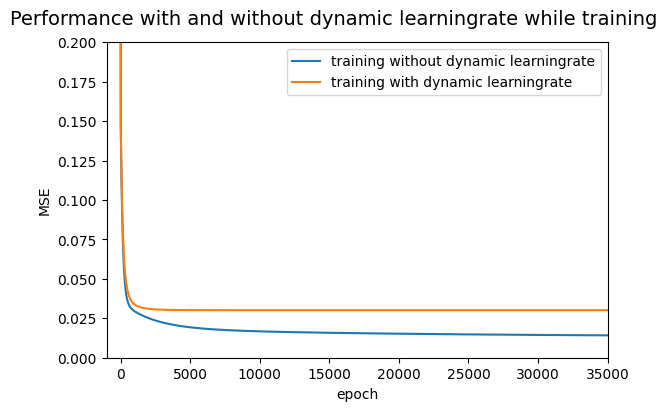

In [64]:
# Plot the results of the MSE for different epochs
arr_epochs = np.arange(0, 35000)
fig=plt.figure(figsize=(6,4),layout='constrained')
fig.suptitle(r'Performance with and without dynamic learningrate while training', fontsize=14)
ax1=fig.add_subplot(111)
ax1.plot(arr_epochs,mse_train_wo_dyn, label='training without dynamic learningrate')
ax1.plot(arr_epochs,mse_train_w_dyn, label='training with dynamic learningrate')
ax1.set_xlim(-1000, 35000)
ax1.set_ylim(0, .2)
ax1.set_xlabel('epoch')
ax1.set_ylabel('MSE')
ax1.legend()
fig.savefig('images/comparison_dyn_learningrate.png')

This analysis compares the performance of our experiment of a neural network with and without a dynamic learning rate. As shown in the figure, the model trained without a dynamic learning rate consistently achieved a lower MSE during training compared to the model with dynamic learning rate.

This suggests that, for this specific dataset and network architecture, a static learning rate may be more effective. One possible explanation for the poorer performance with dynamic learning rate is that the reduction in learning rate every 100 epochs may have been too aggressive, causing the model to converge prematurely and become stuck in a suboptimal solution. Further investigation with different learning rate decay schedules may be warranted.

### 2.5 Evaluate Models

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Create models with the same initial weights and biases and change the hyperparameters
nn_2hl_new = NeuralNetwork_2hl.load_model('../models/2hl_model_before_training.pkl')


mse_train = nn_2hl_new.train(np.squeeze(X_train), y_train.reshape(-1, 1), epochs=6000, learningrate = .001, print_output = False)

# Corrección del input_size para el segundo modelo
nn_base_new = NeuralNetwork_0hl(input_size=10, output_size=1, dyn_learningrate=False)

# Si X_train_new también tiene 15 características, se debe corregir aquí también
# X_train_new = X_train_new[:, :-1]
mse_train = nn_base_new.train(np.squeeze(X_train_new), y_train_new.reshape(-1, 1), epochs=35000, learningrate = .001, print_output = False)


# Define models and datasets
models_old = {'baseline': nn_base, '2hl': nn_2hl, '2hl_new': nn_2hl_new}
datasets_old = {'train': (X_train, y_train), 'val': (X_val, y_val), 'test': (X_test, y_test)}
models_new = {'baseline_new': nn_base_new}
datasets_new = {'train_new': (X_train_new, y_train_new), 'val_new': (X_val_new, y_val_new), 'test_new': (X_test_new, y_test_new)}

# Generate predictions and calculate MSEs
results = {}
dict_pred = {}
for model_name, model in models_old.items():
    results[model_name] = {}
    for dataset_name, (X, y) in datasets_old.items():
        pred = model.predict(np.squeeze(X))
        if dataset_name == 'test':
            dict_pred[model_name] = pred
        mse = np.mean(np.square(y - pred))
        results[model_name][dataset_name] = mse

for model_name, model in models_new.items():
    results[model_name] = {}
    for dataset_name, (X, y) in datasets_new.items():
        pred = model.predict(np.squeeze(X))
        if dataset_name == 'test_new':
            dict_pred[model_name] = pred
        mse = np.mean(np.square(y - pred))
        results[model_name][dataset_name] = mse

# Print Results
print(f"{'':<25} {'Old hyper parameters':<25} {'New hyper parameters':<25} ")
print('Baseline Model')
print(f'{'Final MSE (Train): ':<25} {results["baseline"]["train"]:15.4f} {results["baseline_new"]["train_new"]:25.4f}')
print(f'{'Final MSE (Validation): ':<25} {results["baseline"]["val"]:15.4f} {results["baseline_new"]["val_new"]:25.4f}')
print(f'{'Final MSE (Test): ':<25} {results["baseline"]["test"]:15.4f} {results["baseline_new"]["test_new"]:25.4f}')

print('2-Layer Model')
print(f'{'Final MSE (Train): ':<25} {results["2hl"]["train"]:15.4f} {results["2hl_new"]["train"]:25.4f}')
print(f'{'Final MSE (Validation): ':<25} {results["2hl"]["val"]:15.4f} {results["2hl_new"]["val"]:25.4f}')
print(f'{'Final MSE (Test): ':<25} {results["2hl"]["test"]:15.4f} {results["2hl_new"]["test"]:25.4f}')

                          Old hyper parameters      New hyper parameters      
--- Baseline Model ---
Final MSE (Train):                 0.0134                    0.0142
Final MSE (Validation):            0.0315                    0.0285
Final MSE (Test):                  0.1777                    0.0418
--- 2-Layer Model ---
Final MSE (Train):                 0.0087                    0.0155
Final MSE (Validation):            0.0126                    0.0055
Final MSE (Test):                  0.0444                    0.0778


The results demonstrate a moderate improvement in the performance of the **baseline model** following hyperparameter optimization. As shown in the table, the neural network trained with the refined hyperparameters exhibits a lower Mean Squared Error (MSE) across the validation and testing datasets compared to the baseline model with initial hyperparameters. Notably, the test MSE decreased substantially from 0.1777 to 0.0418. However, the MSE for the training data slightly increased with hyperparameter optimization.

This suggests the hyperparameter tuning process successfully identified a configuration that better generalizes to unseen data and reduces overfitting. While the improvement is not dramatic, it indicates that careful selection of hyperparameters can contribute to more accurate predictions. It’s important to note that differences in emission input timespans prevented the initialization of identical weights and biases across models, potentially introducing some bias due to the randomization process.

The results of the evaluation for the **two-hidden layer model** show a complex picture. While the hyperparameter optimization led to a significantly reduced validation MSE (0.0055 compared to 0.0126 in the baseline model), the test MSE increased from 0.0444 to 0.0778.

This suggests that the optimized hyperparameters may be causing some overfitting to the validation set. This outcome is likely due to the hyperparameter selection being based on achieving the lowest possible validation MSE, which inadvertently led to the model capturing noise or specific patterns within the validation set that do not generalize to the broader population represented by the test set.

Comparing the performance of the baseline model with hyperparameter optimization and the two-hidden layer model without hyperparameter optimization, the results across all datasets are remarkably similar. The two-hidden layer model exhibits slightly lower training and validation MSE values compared to the baseline model, while the baseline model with optimized hyperparameters demonstrates a marginally better performance on the test set.

This suggests that both models perform comparably, and the choice between them may depend on the specific priorities of the application. The baseline model with optimized hyperparameters provides a slight advantage in generalization, as indicated by its lower test MSE, while the two-hidden layer model appears to fit the training and validation data slightly better

### 2.6 Comparison and Visualization

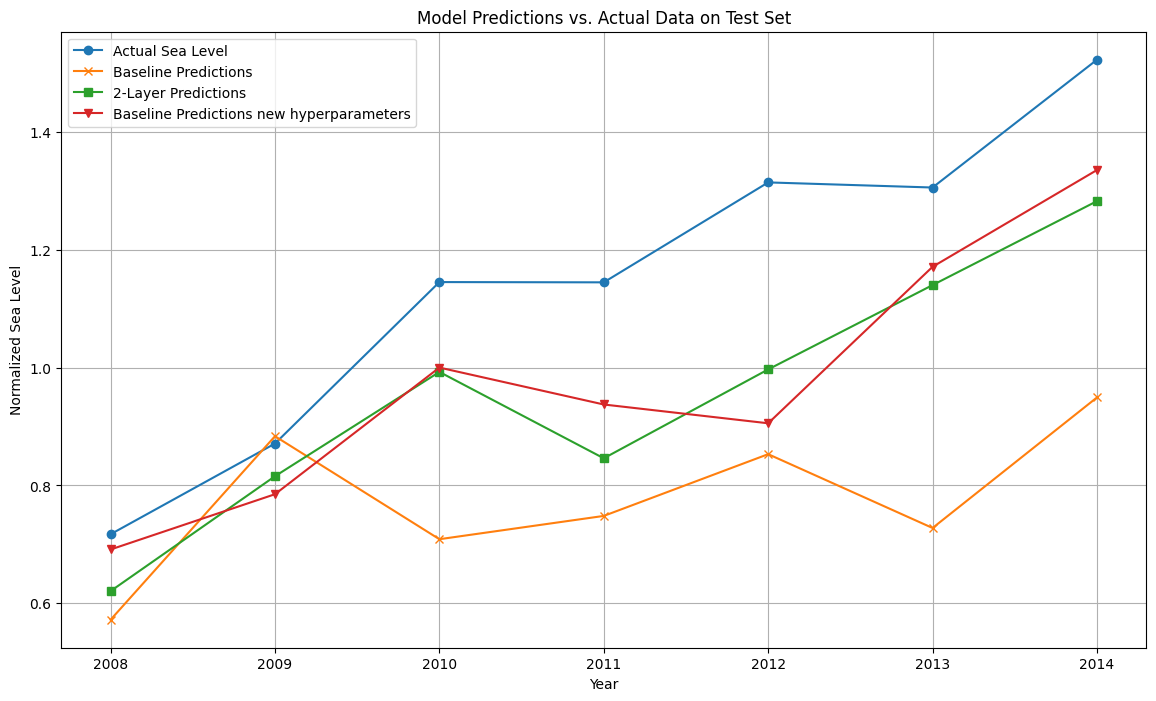

| Model                 |   Train MSE |   Validation MSE |   Test MSE |
|:----------------------|------------:|-----------------:|-----------:|
| Baseline (Linear)     |  0.013378   |       0.0315253  |  0.177703  |
| 2-Hidden-Layer (ReLU) |  0.00868407 |       0.0126038  |  0.0443651 |
| Baseline new hp       |  0.0141812  |       0.0284906  |  0.0417645 |
| 2-Hidden-Layer new hp |  0.0154796  |       0.00550807 |  0.07784   |


In [66]:
# Plotting predictions vs actuals for the test set
fig = plt.figure(figsize=(14, 8))

test_years = np.arange(validation_end_year + 1, test_end_year + 1)

plt.plot(test_years, y_test, label='Actual Sea Level', marker='o')
plt.plot(test_years, dict_pred['baseline'], label='Baseline Predictions', marker='x')
plt.plot(test_years, dict_pred['2hl'], label='2-Layer Predictions', marker='s')
plt.plot(test_years, dict_pred['baseline_new'], label='Baseline Predictions new hyperparameters', marker='v')

plt.title('Model Predictions vs. Actual Data on Test Set')
plt.xlabel('Year')
plt.ylabel('Normalized Sea Level')
plt.legend()
plt.grid(True)
plt.show()

# Results Table
dict_results = {
    'Model': ['Baseline (Linear)', '2-Hidden-Layer (ReLU)', 'Baseline new hp', '2-Hidden-Layer new hp'],
    'Train MSE': [results['baseline']['train'], results['2hl']['train'],results['baseline_new']['train_new'], results['2hl_new']['train']],
    'Validation MSE': [results['baseline']['val'], results['2hl']['val'],results['baseline_new']['val_new'], results['2hl_new']['val']],
    'Test MSE': [results['baseline']['test'], results['2hl']['test'],results['baseline_new']['test_new'], results['2hl_new']['test']]
}
df_results = pd.DataFrame(dict_results)
print(df_results.to_markdown(index=False))
fig.savefig('images/comparison_test-prediction.png')

The curves of the baseline model with hyperparameter optimization and the two-hidden layer model without hyperparameter optimization exhibit a similar trajectory, suggesting a comparable predictive capability. Notably, the standard baseline model demonstrates a particularly poor ability to capture the overall sea level trend, while the optimized baseline and 2-layer models offer marginally improved, though still inaccurate, predictions.

All three models significantly underestimate the sea level rise, indicating a systemic bias in the predictions. While the magnitude of the predicted values is almost consistently lower than the actual data, the models do appear to approximate the general slope of the sea level rise over time. This suggests the models are capturing the direction of the trend, but failing to accurately quantify the magnitude of the change.

A systematic underestimation of sea level severely compromises the predictive abilities of these models. Several factors might contribute to this: a potential bias within the training data itself, an insufficient complexity of the models to fully represent the underlying processes driving sea level rise, or a limitation in the chosen input features. It’s also plausible that the models struggle to account for non-linear accelerations in sea level rise that are not adequately captured by the linear relationships they are learning. Further investigation into the training data, feature engineering, and model architecture is warranted to address this persistent underestimation.

# Appendix

This notebook loads the pre-trained models and analyses the influence of hyper parameters on the neural network with two hidden layers. It performs the following steps:
1. Loads and preprocesses the data.
2. Analysis of the influence of the number of epochs while training
3. Analysis of the influence of the input timespan

Each analysis compares the Mean Squared Error (MSE) on the training and validation data for the two-hidden-layer neural network, as a function of the hyperparameter being examined. To reduce the impact of random weight and bias initialization, the MSE was averaged over 10 independent training runs, each using a newly initialized network.

### Appedix: of not shown but mentioned results of the model analysis for the neural network with two hidden layers

### 4.1 Setup and Data Preparation

#### Import Data from the Data exploration file

### 4.2 Analysis: Prevent overfitting for the two hidden layer neural network

np.random.seed()
arr_mse_train_overfit, arr_mse_vali_overfit = [],[]

for n_epochs in np.logspace(4, 6.5, num=20):
    
    sum_mse_train_overfit, sum_mse_vali_overfit = 0, 0

    for _ in range(100):
         
        # Train the NN
        nn = NeuralNetwork_2hl(input_size=14, hidden_size1=8, hidden_size2=4, output_size=1)
        mse_train = nn.train(np.squeeze(X_train), y_train.reshape(-1, 1), epochs=int(n_epochs), learningrate = .001, print_output = False)
        
        # Create predictions for validation set
        pre_vali = nn.predict(np.array([np.squeeze(X_val)]))

        #  Add the MSE (for calculation of the mean)
        sum_mse_vali_overfit += np.mean(np.square(y_val - pre_vali))
        sum_mse_train_overfit += mse_train[-1]

        # Print error message if the MSE doesn't coverge
        if round(mse_train[-1],4) != round(mse_train[-2],4):
            print('Epochs: ' + str(int(n_epochs)) + '    Error: Not enough epochs!')

        # Calculate the mean        
    arr_mse_train_overfit += [sum_mse_train_overfit/100]
    arr_mse_vali_overfit += [sum_mse_vali_overfit/100]

    print('Epochs: ' + str(int(n_epochs)) + '   MSE = ' + str(round(arr_mse_train_overfit[-1],4)))

    # Plot the results of the MSE for different epochs
arr_epochs = np.logspace(4, 6.5, num=20)
arr_epochs = arr_epochs.astype(np.int64)
fig=plt.figure(figsize=(6,8),layout='constrained')
fig.suptitle(r'MSE for different training epochs', fontsize=14)
ax1=fig.add_subplot(211)
ax1.plot(arr_epochs,arr_mse_train_overfit)
ax1.set_title(r'MSE of training data')
ax2=fig.add_subplot(212)
ax2.plot(arr_epochs,arr_mse_vali_overfit)
ax2.set_title(r'MSE of validatiom data')
for ax in [ax1,ax2]:
    ax.set_xscale('log')
    ax.set_xlabel('number of training epochs')
    ax.set_ylabel('MSE')
fig.savefig('images/analysis_training_epochs_2hl.png')

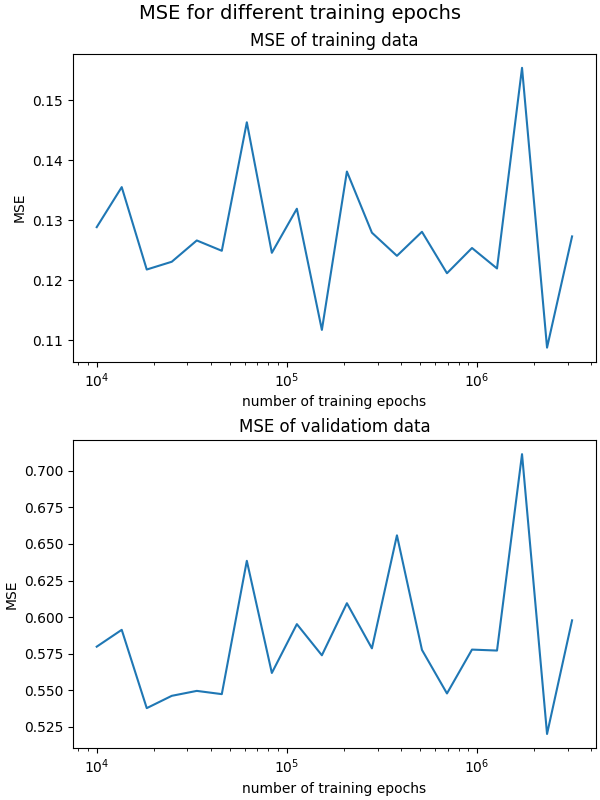

In [67]:
# Pre-generated image of the overfitting analysis
from IPython.display import Image
Image(filename='images/analysis_training_epochs_2hl.png')

This plot shows the Mean Squared Error (MSE) on the training and validation data for the neural network with two hidden layers. The x-axis represents the number of training epochs. To mitigate the impact of random weight and bias initialization, the MSE was averaged over 100 independent training runs, each with a newly initialized neural network. The results are used in the model_analysis notebook for comparison with the single-layer neural network.

### 4.3 Analysis of the influence of the input timespan for the two hidden layer neural network

arr_mse_train, arr_mse_vali = [],[]
y_data = np.array(sealevel_norm.loc[1970:2014])

for timespan in np.arange(10,101,5):

    # Split the data
    X_train_loop, y_train_loop = get_GHG_sequence(timespan, GHG_past_norm, 1970, train_end_year)
    X_vali_loop, y_vali_loop = get_GHG_sequence(timespan, GHG_past_norm, train_end_year + 1, validation_end_year)

    sum_mse_train, sum_mse_vali = 0, 0

    for _ in range(100):

        # Train the NN
        nn = NeuralNetwork_2hl(input_size=14, hidden_size1=8, hidden_size2=4, output_size=1)
        mse_train = nn.train(np.squeeze(X_train_loop), y_train_loop.reshape(-1, 1), epochs=13500, learningrate = .001, print_output = False)
        
        # Create predictions for test set
        pre_vali = nn.predict(np.array([np.squeeze(X_vali_loop)]))

        # Add the MSE (for calculation of the mean)
        sum_mse_vali += np.mean(np.square(y_vali_loop - pre_vali))
        sum_mse_train += mse_train[-1]

    # Calculate the mean        
    arr_mse_train += [sum_mse_train/100]
    arr_mse_vali += [sum_mse_vali/100]

    print('Timespan: ' + str(timespan) + ' years: MSE = ' + str(round(arr_mse_train[-1],4)))

    # Plot the results of the MSE for different input timespans
arr_timespans = np.arange(10,101,5)
fig=plt.figure(figsize=(6,8),layout='constrained')
fig.suptitle(r'MSE for different input timespans', fontsize=14)
ax1=fig.add_subplot(211)
ax1.plot(arr_timespans,arr_mse_train)
#ax1.set_yscale('log')
ax1.set_title(r'MSE of training data')
#ax1.axis([9, 101,10**(-12), 10**(-1)])
ax2=fig.add_subplot(212)
ax2.plot(arr_timespans,arr_mse_vali)
ax2.set_title(r'MSE of validation data')
#ax2.axis([9, 101,0, 1])
for ax in [ax1,ax2]:
    ax.set_xlabel('input timespan')
    ax.set_ylabel('MSE')
#fig.savefig('images/analysis_input_timespan_2hl.png')

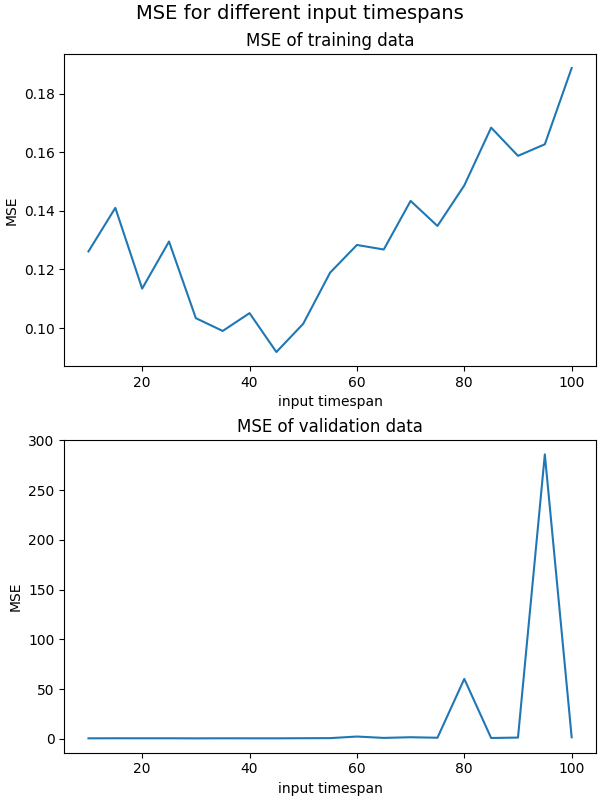

In [68]:
# Pre-generated image of the analysis of the influence of the input timespan
from IPython.display import Image
Image(filename='images/analysis_input_timespan_2hl.png')

Similar to the analysis above the results of this plot are used in the model_analysis notebook for comparison with the single-layer neural network. This plot shows the Mean Squared Error (MSE) on the training and validation data for the neural network with two hidden layers. The x-axis represents the used input timespan of GHG emissions while training the data. To mitigate the impact of random weight and bias initialization, the MSE was averaged over 100 independent training runs, each with a newly initialized neural network.

# 3. Future Scenario Analysis

This notebook uses the best-performing model (determined in `02_model_analysis.ipynb`) to predict future sea level rise based on different GHG emission scenarios. It performs the following steps:
1. Loads the future GHG emission scenario data.
2. Loads the chosen, pre-trained model from the `../models/` directory.
3. Prepares the input sequences for the model based on the future scenarios.
4. Generates predictions for sea level rise up to the year 2050 for each scenario.
5. Visualizes the results and presents them in a final summary table.
6. Comparison of our results to the ones from IPCC

### 3.1 Setup and Data Preparation

In [69]:
# Set random seed for reproducibility
np.random.seed(42)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)


# Create continous yearly data for the GHG scenarios
for year in df_pred.index[:-1]:
    diff = df_pred.loc[year+5] - df_pred.loc[year]
    for i in range(4):
        df_pred.loc[year+i+1] = df_pred.loc[year] + (i+1)*diff/5
df_pred = df_pred.sort_index()

# Store mean/std for denormalization later
ghg_mean = GHG_past_comb.mean().values[0]
ghg_std = GHG_past_comb.std().values[0]
sealevel_mean = df_sealevel.mean().values[0]
sealevel_std = df_sealevel.std().values[0]

# Normalization 
GHG_past_norm = (GHG_past_comb - ghg_mean) / ghg_std
GHG_pred_norm = (df_pred - ghg_mean) / ghg_std
sealevel_norm = (df_sealevel - sealevel_mean) / sealevel_std

# Sequence for the input
def get_GHG_sequence_X(n_years, df_GHG, start_year, end_year):
    X = list()
    start_ix = start_year-n_years+1
    for i in range(start_ix,end_year-n_years+2):
        end_ix = i + n_years - 1
        seq_x = df_GHG.loc[i:end_ix]
        X.append(seq_x.to_numpy())
    return np.array(X)

### 3.2 Load Model and Generate Predictions

In [70]:
# Load the best model
model = NeuralNetwork_2hl.load_model('../models/2hl_model.pkl')

timespan = 15
prediction_years = np.arange(2014, 2051)
results_denorm = {}

for i,scenario in enumerate(GHG_pred_norm.columns):
    # Combine historical data with scenario trends and create the input sequences
    arr_GHG_norm = pd.concat([GHG_past_norm['annual_emissions_ghg_total_co2eq'],GHG_pred_norm[scenario]]).sort_index()
    x_data_norm = get_GHG_sequence_X(timespan,arr_GHG_norm,2014,2050)

    # Predict the sea level for the scenario
    predictions_norm = model.predict(np.array(x_data_norm))
        
    # Denormalize the predictions
    predictions_denorm = (np.array(predictions_norm) * sealevel_std) + sealevel_mean
    results_denorm[scenario] = predictions_denorm

print('Future predictions generated for all scenarios.')

Future predictions generated for all scenarios.


### 3.3 Visualize and Summarize Results

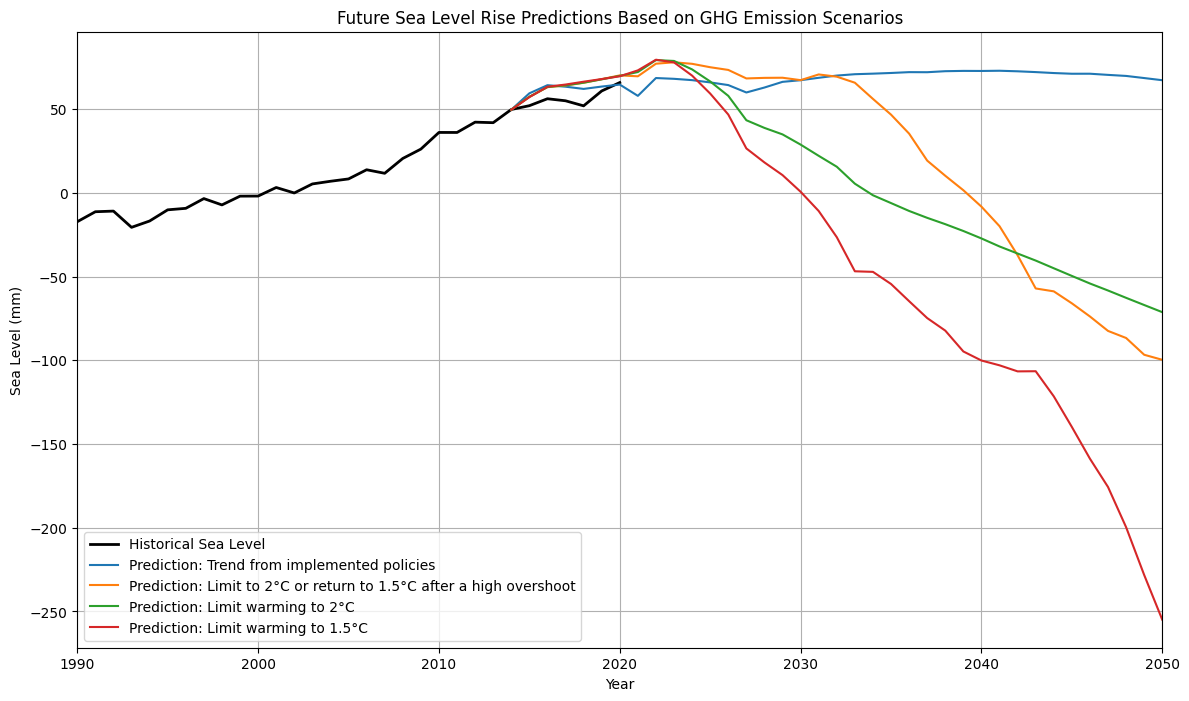

Predicted Sea Level Rise (mm) for Key Years:
|   Year |   Trend from implemented policies |   Limit to 2°C or return to 1.5°C after a high overshoot |   Limit warming to 2°C |   Limit warming to 1.5°C |
|-------:|----------------------------------:|---------------------------------------------------------:|-----------------------:|-------------------------:|
|   2020 |                             64.8  |                                                    70.29 |                  69.99 |                    69.75 |
|   2025 |                             66.09 |                                                    75.16 |                  66.66 |                    59.42 |
|   2030 |                             67.41 |                                                    67.44 |                  28.93 |                     0.76 |
|   2035 |                             71.73 |                                                    46.84 |                  -6.01 |                   -54.35 |
|   204

In [71]:
# Plotting the results
plt.figure(figsize=(14, 8))

# Plot historical sea level data
plt.plot(df_sealevel, label='Historical Sea Level', color='black', linewidth=2)

# Plot predictions for each scenario
for scenario, predictions in results_denorm.items():
    plt.plot(prediction_years, predictions, label=f'Prediction: {scenario}')

plt.title('Future Sea Level Rise Predictions Based on GHG Emission Scenarios')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.legend()
plt.grid(True)
plt.xlim(1990, 2050)
plt.show()

# Create a summary table
summary_data = {'Year': prediction_years}
for scenario, predictions in results_denorm.items():
    summary_data[scenario] = np.squeeze(predictions)

df_summary = pd.DataFrame(summary_data).set_index('Year')

# Display the table for key years
display_years = np.arange(2020,2055,5)
print("Predicted Sea Level Rise (mm) for Key Years:")
print(df_summary.loc[display_years].round(2).to_markdown())

### 3.6 Comparison of our results to the ones from IPCC

Source: 

https://d3qt3aobtsas2h.cloudfront.net/edge/ws/search/projection?type=global&data_layer=warming&format=csv

Fox-Kemper, B., H.T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S.S. Drijfhout, T.L. Edwards, N.R. Golledge, M. Hemer, R.E. Kopp, G. Krinner, A. Mix, D. Notz, S. Nowicki, I.S. Nurhati, L. Ruiz, J.-B. Sallée, A.B.A. Slangen, and Y. Yu, 2021: Ocean, Cryosphere and Sea Level Change. In Climate Change 2021: The Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change [Masson-Delmotte, V., P. Zhai, A. Pirani, S.L. Connors, C. Péan, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M.I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J.B.R. Matthews, T.K. Maycock, T. Waterfield, O. Yelekçi, R. Yu, and B. Zhou (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, pp. 1211–1362, doi:10.1017/9781009157896.011.

Kopp, R. E., Garner, G. G., Hermans, T. H. J., Jha, S., Kumar, P., Reedy, A., Slangen, A. B. A., Turilli, M., Edwards, T. L., Gregory, J. M., Koubbe, G., Levermann, A., Merzky, A., Nowicki, S., Palmer, M. D., & Smith, C. (2023). The Framework for Assessing Changes To Sea-Level (FACTS) v1.0: A platform for characterizing parametric and structural uncertainty in future global, relative, and extreme sea-level change. Geoscientific Model Development, 16, 7461–7489. https://doi.org/10.5194/gmd-16-7461-2023.

Garner, G. G., T. Hermans, R. E. Kopp, A. B. A. Slangen, T. L. Edwards, A. Levermann, S. Nowikci, M. D. Palmer, C. Smith, B. Fox-Kemper, H. T. Hewitt, C. Xiao, G. Aðalgeirsdóttir, S. S. Drijfhout, T. L. Edwards, N. R. Golledge, M. Hemer, G. Krinner, A. Mix, D. Notz, S. Nowicki, I. S. Nurhati, L. Ruiz, J-B. Sallée, Y. Yu, L. Hua, T. Palmer, B. Pearson, 2021. IPCC AR6 Sea Level Projections. Version 20210809. Dataset accessed [19.08.2025] at https://doi.org/10.5281/zenodo.5914709.

In [72]:
# Fetch the data
df_sealevel_pred = pd.read_excel("../data/ipcc_ar6_sea_level_projection_global.xlsx", sheet_name="Total")

# Transform the dataframe
df_sealevel_pred[df_sealevel_pred.columns[4:]] *= 1000
df_sealevel_pred['scenario'] = [x[4:7] for x in df_sealevel_pred['scenario']]

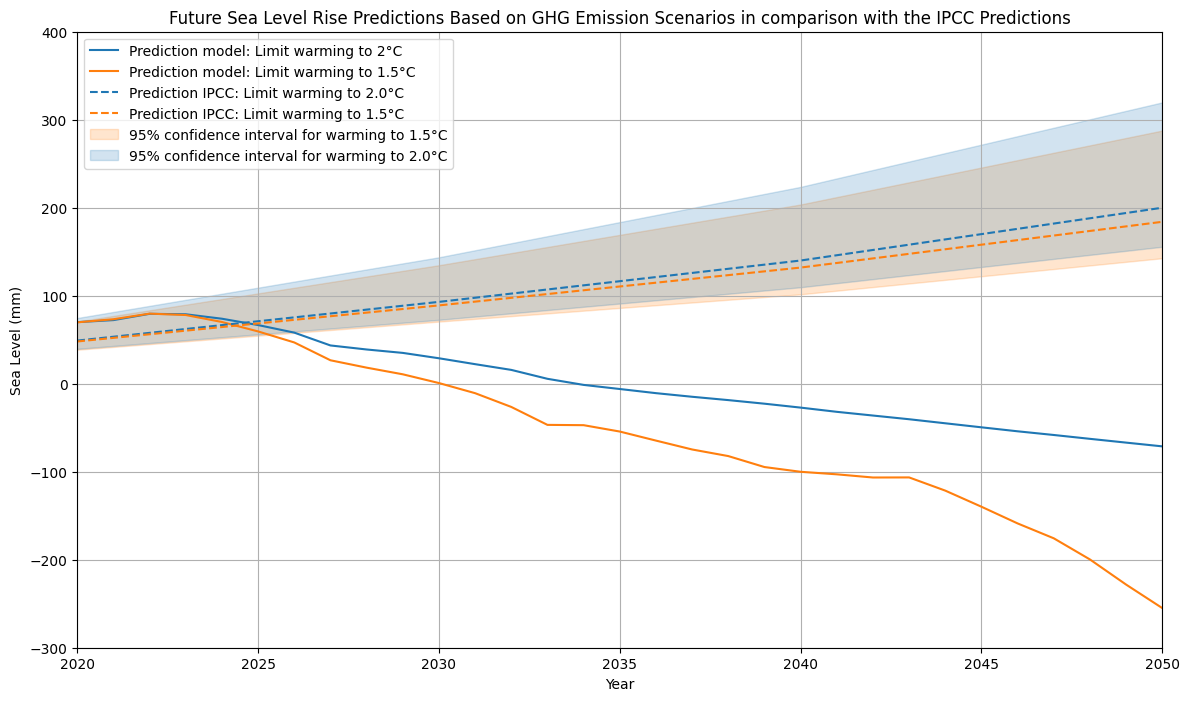

In [73]:
# Plotting the results
fig = plt.figure(figsize=(14, 8))

# Plot predictions for each scenario
for scenario in ['Limit warming to 2°C', 'Limit warming to 1.5°C']:
    plt.plot(prediction_years, results_denorm[scenario], label=f'Prediction model: {scenario}')

arr_time = df_sealevel_pred.columns[4:].astype(np.float64)
sl_pred_1_5_m = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '1.5') & (df_sealevel_pred['quantile'] == 50)].to_numpy())[4:].astype(np.float64)
sl_pred_2_0_m = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '2.0') & (df_sealevel_pred['quantile'] == 50)].to_numpy())[4:].astype(np.float64)
sl_pred_1_5_uq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '1.5') & (df_sealevel_pred['quantile'] == 95)].to_numpy())[4:].astype(np.float64)
sl_pred_2_0_uq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '2.0') & (df_sealevel_pred['quantile'] == 95)].to_numpy())[4:].astype(np.float64)
sl_pred_1_5_lq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '1.5') & (df_sealevel_pred['quantile'] == 5)].to_numpy())[4:].astype(np.float64)
sl_pred_2_0_lq = np.squeeze(df_sealevel_pred.loc[(df_sealevel_pred['scenario'] == '2.0') & (df_sealevel_pred['quantile'] == 5)].to_numpy())[4:].astype(np.float64)

plt.plot(arr_time,sl_pred_2_0_m, color = 'C0', linestyle='--', label=f'Prediction IPCC: Limit warming to 2.0°C')
plt.plot(arr_time,sl_pred_1_5_m, color = 'C1', linestyle='--', label=f'Prediction IPCC: Limit warming to 1.5°C')

plt.fill_between(arr_time, sl_pred_1_5_lq, sl_pred_1_5_uq, color='C1', alpha=0.2, label=f'95% confidence interval for warming to 1.5°C') 
plt.fill_between(arr_time, sl_pred_2_0_lq, sl_pred_2_0_uq, color='C0', alpha=0.2, label=f'95% confidence interval for warming to 2.0°C') 

plt.title('Future Sea Level Rise Predictions Based on GHG Emission Scenarios in comparison with the IPCC Predictions')
plt.xlabel('Year')
plt.ylabel('Sea Level (mm)')
plt.legend()
plt.grid(True)
plt.xlim(2020, 2050)
plt.ylim(-300, 400)
plt.show()

# Create a summary table
summary_data = {'Year': prediction_years}
for scenario, predictions in results_denorm.items():
    summary_data[scenario] = np.squeeze(predictions)

df_summary = pd.DataFrame(summary_data).set_index('Year')
fig.savefig('images/comparison_IPCC-prediction.png')

Our model’s predictions consistently underestimate future sea level rise compared to both the IPCC’s 1.5°C and 2.0°C warming scenarios. This underestimation was also observed during the evaluation of our model on the test set, where it systematically predicted lower sea levels than were actually observed. While our model could approximately predict the correct slope during this test, it fails to do so here. The slope of our prediction notably decreases over time, contrasting with the consistently increasing slopes shown in the IPCC projections.

A key factor contributing to this discrepancy is the limited nature of our training data, which consisted exclusively of periods with rising GHG emissions and corresponding rising sea levels. This inherently restricts the model’s ability to accurately predict scenarios involving stabilized or declining emissions, as represented by the IPCC’s 1.5°C scenario. The model essentially learns a relationship between increasing emissions and increasing sea level, and cannot extrapolate beyond that association. A contributing factor to this limitation is the relatively short input timespan used, which hinders the model’s ability to capture the cumulative effects of past emissions.

Furthermore, the IPCC projections benefit from more complex climate models that incorporate a wider range of feedback mechanisms and potential emission pathways, including scenarios with reduced emissions.

Therefore, the observed underestimation is likely a consequence of both the limited scope of our training data and the simplified representation of climate processes compared to the sophisticated models employed by the IPCC.